<a href="https://colab.research.google.com/github/Molvilada/Aprendizaje-de-maquina/blob/main/Entregable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Entregable 2**
**Nombre:** Laura Daniela Molina Villar


---

### **Ejercicio 1.12**
En principio, como N = 4000, podemos asegurar que la desigualdad de Hoeffding $Pr[|E_{in}(g) - E_{out}(g)| > \epsilon] \leq 2Me^{-2\epsilon^{2}N}$será pequeña, por lo tanto podemos decir que $E_{in}(g)$ será cercano a $E_{out}(g)$, lo que nos genera dos posibles casos:



1.   Si $E_{in}(g)$ resulta ser cercano a 0, podemos afirmar que g se va a aproximar a f con una alta probabilidad (es decir fue un éxito).
2.   Si $E_{in}(g)$ NO resulta ser cercano a 0, entonces NO podemos afirmar que g se va a aproximar a f (es decir es un fallo)

Por lo que podemos asegurar que se va a generar una hipótesis (el algoritmo de aprendizaje siempre genera una hipotesis, sea buena o mala) y podemos declarar si fallamos o no.


### **Problema 1.2**

a.   Como $h(x) = sign(w^{t}x)$,  si $h(x) = 1$ entonces $w^{t}x > 0$, por el contrario,  si $h(x) = -1$ entonces $w^{t}x < 0$, así la línea que separa estas dos regiones es $w^tx = 0$, o de forma expandida 
$$w_0 + w_1x_1 + w_2x_2 = 0$$
Si representamos la recta en la forma $x_2 = ax_1 + b$, al despejar nos queda  $x_2 = \frac{w_0}{-w_2} + \frac{w_1}{-w_2}x_1$ , asi \\
$$a = -\frac{w_1}{w_2} \quad  b = -\frac{w_0}{w_2}$$ \\
b.   Para $w = [1, 2, 3]$

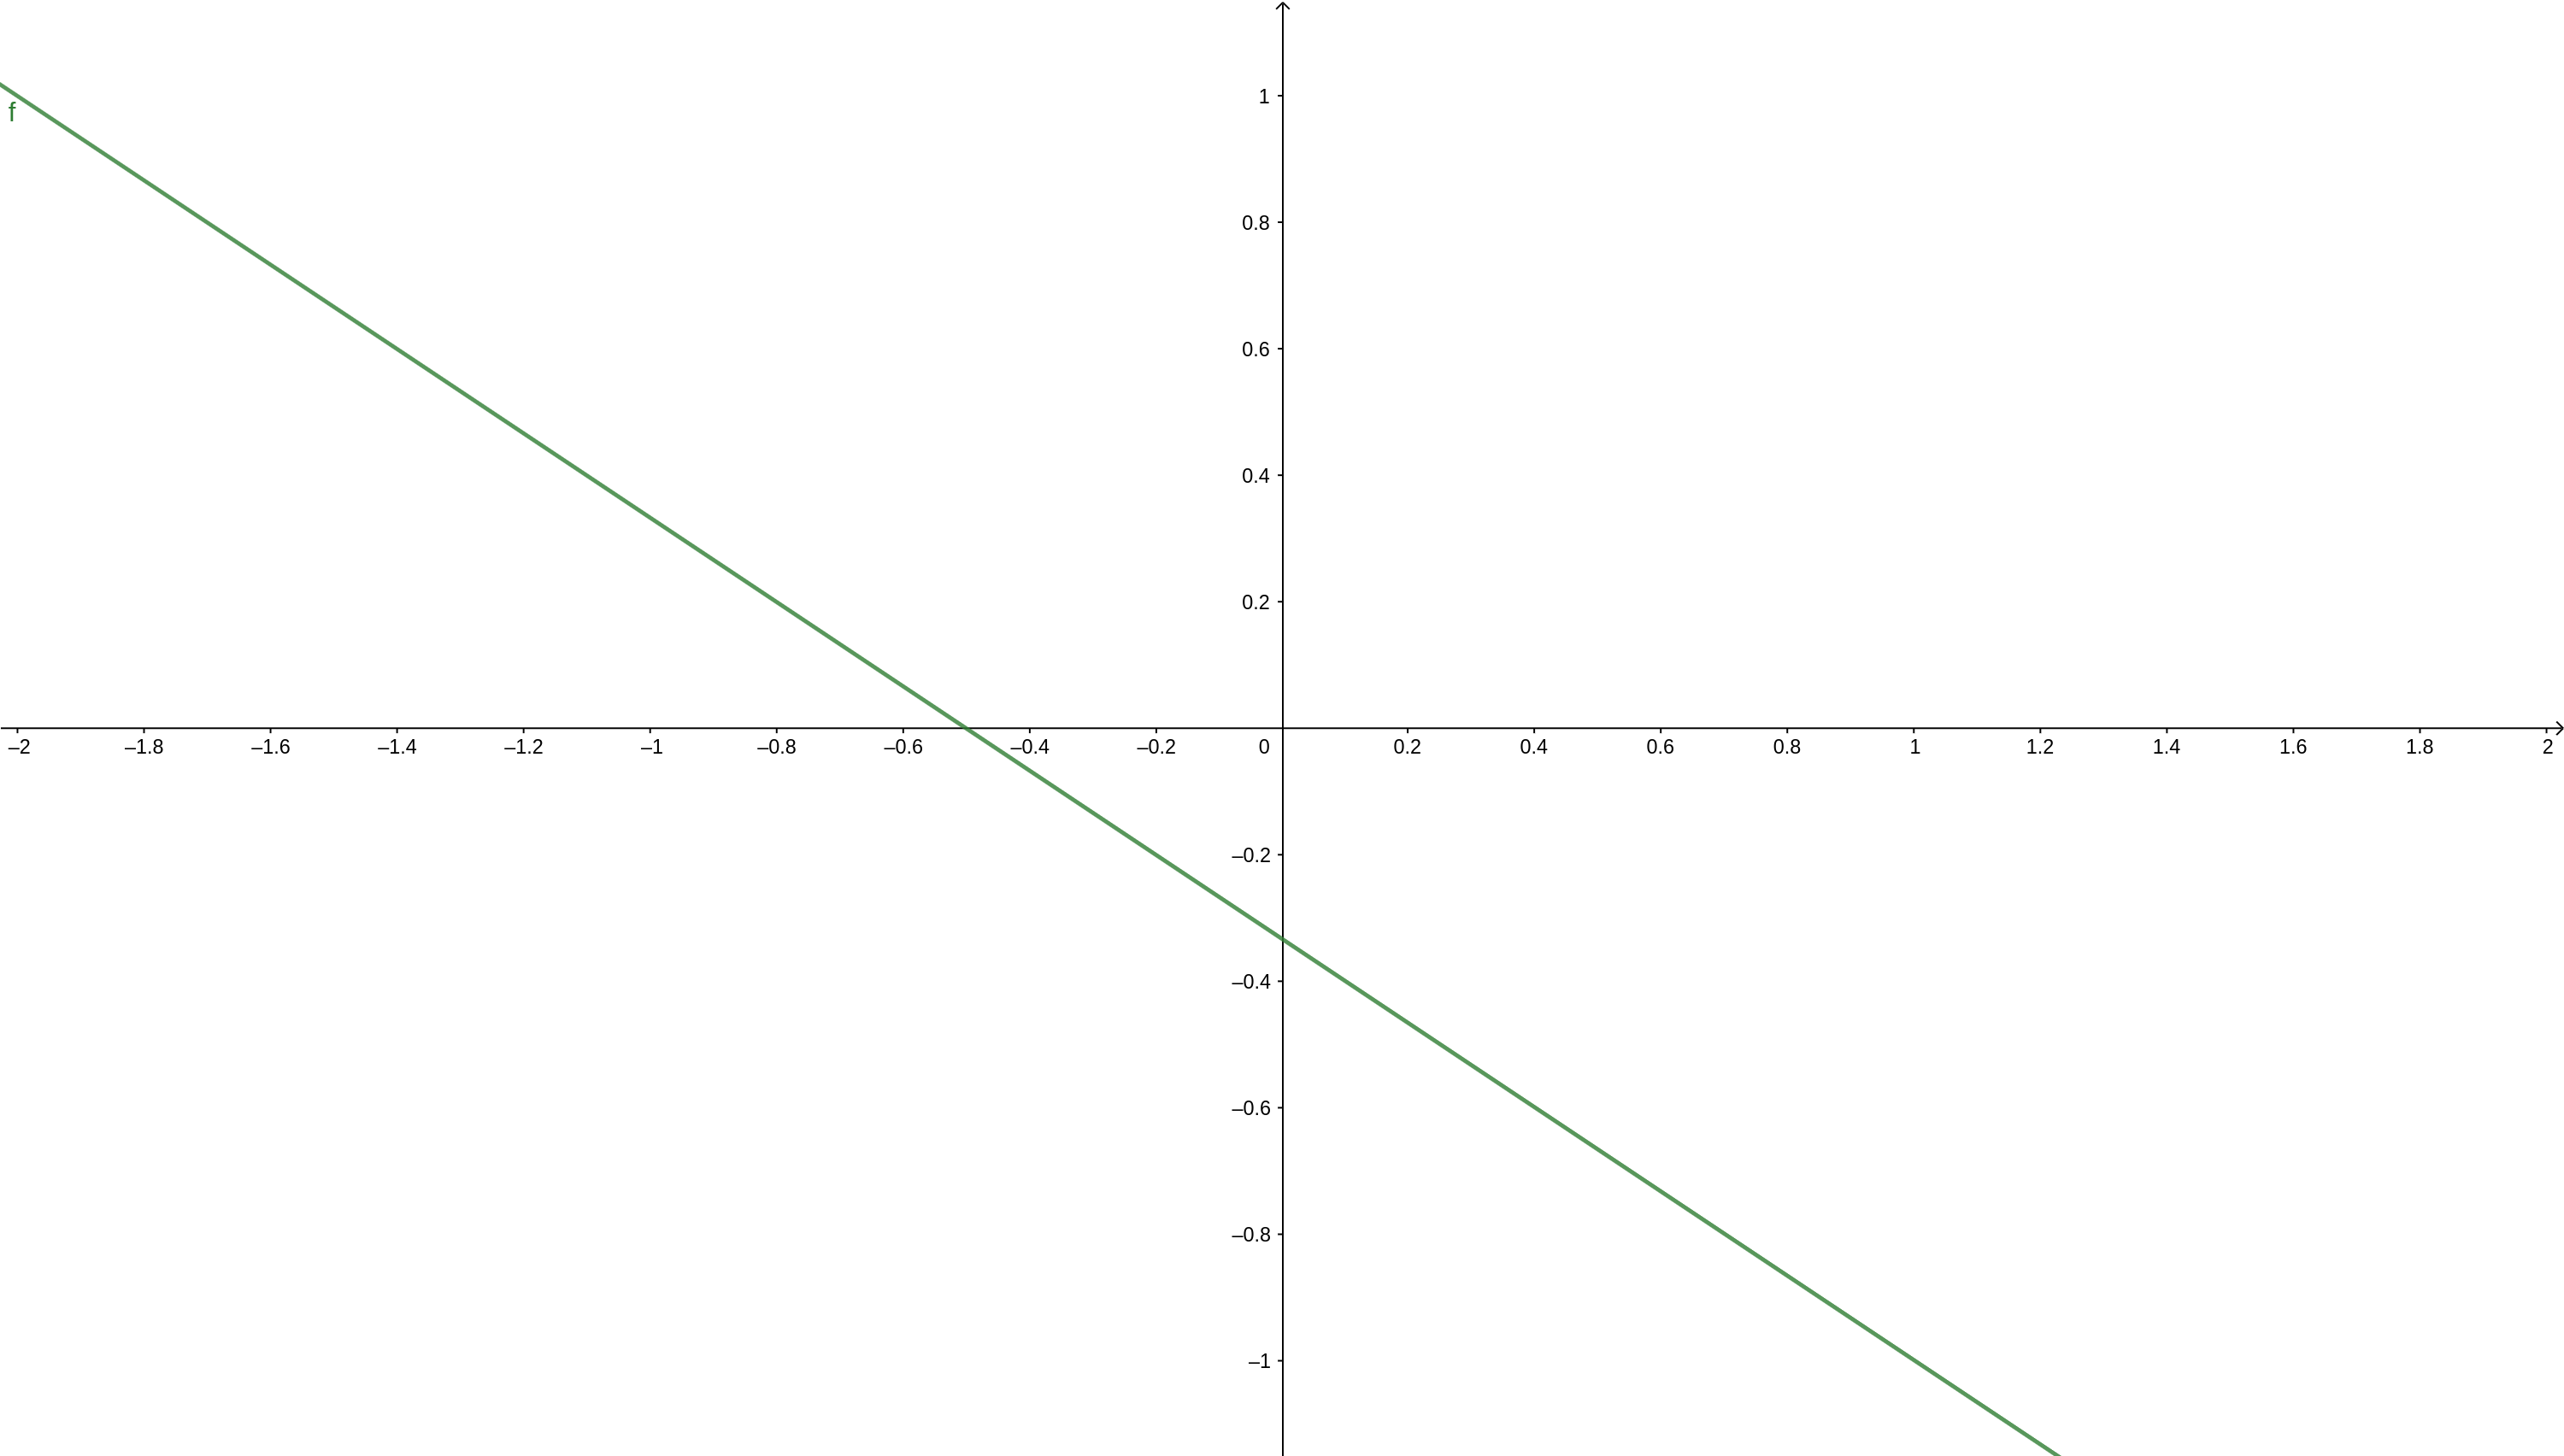

Para $w = -[1, 2, 3]$ sería exactamente la misma gráfica, la diferencia entre las dos es donde estaría la región $h(x) = 1$ y $h(x) = -1$, ya que en la primera opción la parte positiva estaría arriba, y en la segunda opción estaría abajo.






### **Problema 1.4**



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def generateParameters(cant, rang):
  w = np.zeros(cant);
  for i in range(cant):
    w[i] = random.randint(-rang,rang)
    if i == cant - 1 and w[i] == 0:
      w[i] = random.randint(-rang,rang);
  return w;

In [ ]:
def generatePoints(N, w, rang):
  X = np.zeros((N,len(w)))
  Y = np.random.randint(2, size=N)
  for point in range(N):
    X[point][0] = 1
    acum = -w[0]/w[len(w) - 1]
    for i in range(1, len(w)):
      X[point][i] = random.uniform(0, rang)
      if i != len(w) - 1:
         acum += X[point][i]*(-w[i]/w[len(w) - 1])
    if acum > X[point][len(w) - 1]:
      Y[point] = 0
    else:
      Y[point] = 1
  return X, Y

In [ ]:
def generateFunction(N, rang):
  w = generateParameters(3, rang)
  xTarget = np.arange(rang)
  yTarget = xTarget*(-w[1]/w[2]) - (w[0]/w[2])
  X , Y = generatePoints(N, w, rang)
  return xTarget, yTarget, X, Y, w

In [ ]:
def converge(X, Y, w):
  yHeat = np.zeros(len(Y))
  for i in range(len(X)):
    yTarget = X[i][1]*(-w[1]/w[2]) - (w[0]/w[2])
    if X[i][2] > yTarget:
      yHeat[i] = 1
    else:
      yHeat[i] = 0
  error = np.mean( yHeat != Y ) * 100
  if error == 0:
    return True
  return False

In [ ]:
def perceptron(X, Y, cant, range):
  P = X[Y == 0]
  N = X[Y == 1]  
  w = generateParameters(cant, range)
  convertion = 0;
  while not converge(X, Y, w):
    if convertion ==200000:
      break
    convertion += 1
    x = random.choice(X)
    if x in P and np.dot(w, x) < 0:
      w = np.add(w, x)  
    elif x in N and np.dot(w, x) >= 0:
      w = np.subtract(w, x);
  return w, convertion


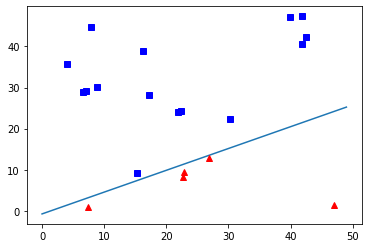

In [ ]:
# Punto a
xTarget, yTarget, X, Y, w = generateFunction(20, 50)
plt.plot(xTarget,yTarget)
plt.plot(X[:, 1][Y == 0], X[:, 2][Y == 0], 'r^')
plt.plot(X[:, 1][Y == 1], X[:, 2][Y == 1], 'bs')



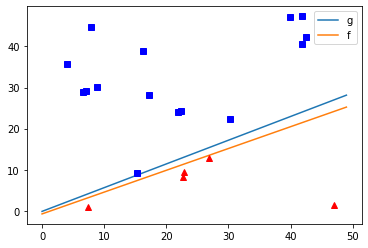

In [ ]:
# Punto b
wP, convertion = perceptron(X, Y, 3, 50)
yPerceptron = xTarget*(-wP[1]/wP[2]) - (wP[0]/wP[2])
plt.plot(xTarget,yPerceptron, label="g")
plt.plot(xTarget,yTarget, label="f")
plt.plot(X[:, 1][Y == 0], X[:, 2][Y == 0], 'r^')
plt.plot(X[:, 1][Y == 1], X[:, 2][Y == 1], 'bs')
plt.legend()

In [ ]:
print("Número de actualizaciones antes de converger: ", convertion)

Número de actualizaciones antes de converger:  25


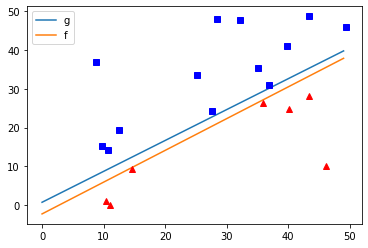

In [ ]:
# Punto c
xTarget, yTarget, X, Y, w = generateFunction(20, 50)
wP, convertion = perceptron(X, Y, 3, 50)
yPerceptron = xTarget*(-wP[1]/wP[2]) - (wP[0]/wP[2])
plt.plot(xTarget,yPerceptron, label="g")
plt.plot(xTarget,yTarget, label="f")
plt.plot(X[:, 1][Y == 0], X[:, 2][Y == 0], 'r^')
plt.plot(X[:, 1][Y == 1], X[:, 2][Y == 1], 'bs')
plt.legend()

In [ ]:
print("Número de actualizaciones antes de converger: ", convertion)

Número de actualizaciones antes de converger:  21


Se puede observar que el número de actualizaciones tomadas para converger es muy parecido entre el punto c y d, 25 y 21 respectivamente.

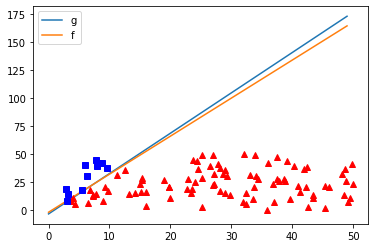

In [ ]:
# Punto d
xTarget, yTarget, X, Y, w = generateFunction(100, 50)
wP, convertion = perceptron(X, Y, 3, 50)
yPerceptron = xTarget*(-wP[1]/wP[2]) - (wP[0]/wP[2])
plt.plot(xTarget,yPerceptron, label="g")
plt.plot(xTarget,yTarget, label="f")
plt.plot(X[:, 1][Y == 0], X[:, 2][Y == 0], 'r^')
plt.plot(X[:, 1][Y == 1], X[:, 2][Y == 1], 'bs')
plt.legend()

In [ ]:
print("Número de actualizaciones antes de converger: ", convertion)

Número de actualizaciones antes de converger:  371


Se puede observar que el número de actualizaciones tomadas para converger es muy con 20 puntos y con 100 puntos crece drásticamente, de 21 a 371 actualizaciones.

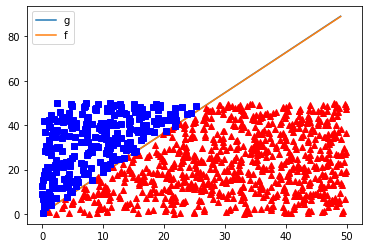

In [ ]:
# Punto e
xTarget, yTarget, X, Y, w = generateFunction(1000, 50)
wP, convertion = perceptron(X, Y, 3, 50)
yPerceptron = xTarget*(-wP[1]/wP[2]) - (wP[0]/wP[2])
plt.plot(xTarget,yPerceptron, label="g")
plt.plot(xTarget,yTarget, label="f")
plt.plot(X[:, 1][Y == 0], X[:, 2][Y == 0], 'r^')
plt.plot(X[:, 1][Y == 1], X[:, 2][Y == 1], 'bs')
plt.legend()

In [ ]:
print("Número de actualizaciones antes de converger: ", convertion)

Número de actualizaciones antes de converger:  7423


Se puede observar que con 1000 puntos la cantidad de iteraciones creció a 7423, con respecto a 100 puntos que solo fueron 371 iteraciones.

In [ ]:
# Punto f y g
w = generateParameters(10, 50)
X, Y = generatePoints(10, w, 10)
wP, convertion = perceptron(X, Y, 5, 10)

Los puntos f y g no fue posible hacerlos ya que nunca terminaron de correr.

**Punto h**

Claramente la conclusión más grande es que a mayor cantidad de puntos y mayor cantidad de dimensiones, mayor es el tiempo que se demora en converger el algoritmo, todo esto teniendo en cuenta que el vector w es elegido aleatoriamente al principio, por lo tanto esto también puede afectar o beneficiar la cantidad de iteraciones necesarias para converger.

### **Problema 1.6**

a. Para una sola muestra con 10 canicas, se tiene que 
$$P(v=0) = (1-\mu)^{10}$$

Con $\mu = 0.05, P(v=0) = 0.599$, con $\mu = 0.5, P(v=0) = 9.765\times	10^{-4}$ y con $\mu = 0.8, P(v=0) = 1.024\times	10^{-7}$ \\

b. Para 1000 muestras independientes, y que al menos una tenga $v = 0$, su probabilidad sería igual a 1 menos la probabilidad de todas aquellas que $v > 0$, por lo tanto
$$P(v = 0) = 1 - \prod_{i=1}^{1000}P(vi > 0)$$
$$P(v = 0) = 1 - \prod_{i=1}^{1000}1 - P(vi = 0)$$
$$P(v = 0) = 1 - \prod_{i=1}^{1000}1 - (1 - \mu)^{10}$$
$$P(v = 0) = 1 - [1 - (1 - \mu)^{10}]^{1000}$$

Con $\mu = 0.05, P(v=0) = 1$, con $\mu = 0.8, P(v=0) = 0.6235$ y con $\mu = 0.8, P(v=0) = 1.024\times	10^{-4}$ \\

c. Para 1'000.000 muestras independientes sería:
$$P(v = 0) = 1 - [1 - (1 - \mu)^{10}]^{1000000}$$

Con $\mu = 0.05, P(v=0) = 1$, con $\mu = 0.8, P(v=0) = 1$ y con $\mu = 0.8, P(v=0) = 0.9733$ \\

### **Problema 1.9**

a. Se tiene que

$$P[t \geq \alpha] = P[st \geq s\alpha]$$
$$P[t \geq \alpha] = P[e^{st} \geq e^{s\alpha}]$$

Por desigualdad de Markov tenemos que $P[e^{st} \geq e^{s\alpha}] \leq \frac{E(e^{st})}{e^{sa}} = e^{-s\alpha}T(s)$, por lo tanto

$$P[t \geq \alpha] \leq e^{-s\alpha}T(s)$$

b. Se tiene que

$$P[u \geq \alpha] = P[sNu \geq sN\alpha]$$
$$P[u \geq \alpha] \leq  e^{-sN\alpha}E(e^{sNu})$$
$$P[u \geq \alpha] \leq e^{-sN\alpha}\prod_{n=1}^{N}E(e^{su_n})$$
$$P[u \geq \alpha] \leq e^{-sN\alpha}(E(e^{su_n}))^{N}$$
$$P[u \geq \alpha] \leq (e^{-s\alpha}U(s))^{N}$$

c. En este caso

$$U(s) = E(e^{su_n})$$
$$U(s) = e^{s\cdot0}P[u_n = 0] + e^{s\cdot1}P[u_n = 1]$$
$$U(s) = 1\cdot\frac{1}{2} + e^{s}\cdot\frac{1}{2}$$
$$U(s) = \frac{1}{2} (1 + e^{s})$$
$$e^{-s\alpha}U(s) = e^{-s\alpha}\frac{1}{2} (1 + e^{s})$$

Para minizar $e^{-s\alpha}U(s)$ vamos a derivarla con respecto a $s$ e igualarla a 0

$$\frac{d}{ds}\left[e^{-s\alpha}\frac{1}{2} (1 + e^{s})\right] = -\frac{1}{2} e^{-s\alpha} (\alpha + e^{s}(\alpha - 1)) = 0$$

$$s = -ln\left(\frac{1 - \alpha}{\alpha}\right)$$


d. Teniendo en cuenta que tenemos una moneda justa, podemos afirmar que $E(u) = \frac{1}{2}$, asi

$$P\left[ u \geq \frac{1}{2} +\epsilon \right] \leq (e^{-s\frac{1}{2} +\epsilon}U(s))^{N}$$

$$P\left[ u \geq \frac{1}{2} +\epsilon \right] = min(e^{-s\frac{1}{2} +\epsilon}U(s))^{N}$$

$$P\left[ u \geq \frac{1}{2} +\epsilon \right] = \left(e^{-\left(-ln\left(\frac{1 - \frac{1}{2} +\epsilon}{\frac{1}{2} +\epsilon}\right)\right)\frac{1}{2} +\epsilon}U\left(-ln\left(\frac{1 - \frac{1}{2} +\epsilon}{\frac{1}{2} +\epsilon}\right)\right)\right)^{N}$$

$$P\left[ u \geq \frac{1}{2} +\epsilon \right] = \left(e^{-\left(-ln\left(\frac{1 - \frac{1}{2} +\epsilon}{\frac{1}{2} +\epsilon}\right)\right)\frac{1}{2} +\epsilon}\frac{1}{2}\left( 1 + e^{-ln\left(\frac{1 - \frac{1}{2} +\epsilon}{\frac{1}{2} +\epsilon}\right)} \right) \right)^{N}$$

Al expandir la ecuación queda
 $$P\left[ u \geq \frac{1}{2} +\epsilon \right] = 2^{-N\left[1+\left(\frac{1}{2} + \epsilon \right)\log_2(\frac{1}{2} + \epsilon)+\left(\frac{1}{2} - \epsilon \right)\log_2(\frac{1}{2} - \epsilon)\right]} = 2^{-\beta N}$$

### **Problema 1.12**

a. Para minimizar $E_{in}(h) = \sum_{n=1}^{N} (h-y_n)^{2}$ toca derivar con respecto a h e igual a 0, por lo tanto

$$\frac{d}{dh}\left[E_{in}(h)\right] = 2\sum_{n=1}^{N} (h-y_n) = 0$$

$$\sum_{n=1}^{N} h - \sum_{n=1}^{N} y_n = 0$$

$$Nh = \sum_{n=1}^{N} y_n$$

$$h = \frac{1}{N} \sum_{n=1}^{N} y_n = h_{mean}$$ 

b. Hacemos lo mismo que en (a) para minimizar

$$\frac{d}{dh}\left[E_{in}(h)\right] = \sum_{n=1}^{N} sign(h-y_n) = 0$$

Esa derivada solo será cero cuando el número de elementos positivos sea igual al número de elementos negativos, pero esto solo ocurrira si $h = mediana({y_1, ..., y_n}) = h_{med}$.

c. En ese caso el valor de $h_{mean}$ incrementará en exceso, ya que $y_N$ contribuye en el cálculo, pero $h_{med}$ permanecerá igual.


